In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

'''Load dataset'''
fashion_mnist = tf.keras.datasets.fashion_mnist

In [2]:
'''Assign data to test and training sets'''
(images_train, labels_train), (images_test, labels_test) = fashion_mnist.load_data()

'''Name classes of data'''
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 
                'Dress', 'Coat', 'Sandal', 'Shirt', 
                'Sneaker', 'Bag', 'Ankle boot']

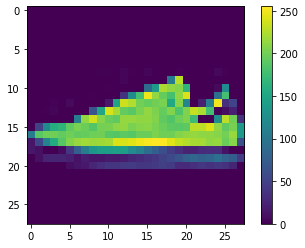

In [3]:
'''Show data split'''
images_train.shape
len(labels_train)
images_test.shape
len(labels_test)

plt.figure()
plt.imshow(images_train[6])
plt.colorbar()
plt.grid(False)
plt.show()

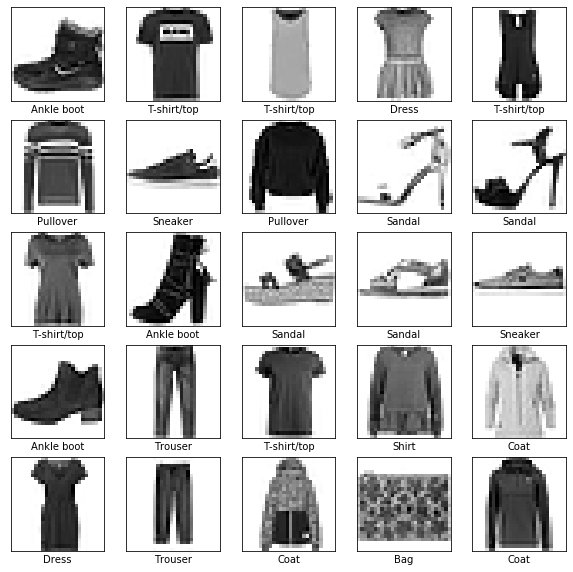

In [4]:
images_train, images_test = images_train / 255.0, images_test / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[labels_train[i]])
plt.show()

In [5]:
'''
Create model and it's layers
Convert 2d array of picture data to 1d
Use 182 nodes of neurons
'''
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [6]:
'''Compile model'''
model.compile(optimizer = 'adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
            metrics=['accuracy'])

In [7]:
'''
Model training:
1. Fit model with training data
2. Start learning process
'''
model.fit(images_train, labels_train, epochs=12)

'''Check coverage with train and test sets'''
test_loss, test_acc = model.evaluate(images_test,  labels_test, verbose=2)
print('Accuracy:', test_acc)

probability_model = tf.keras.Sequential([model,
                tf.keras.layers.Softmax()
])

Epoch 1/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6286 - accuracy: 0.7785
Epoch 2/12
1875/1875 [==============================] - 2s 960us/step - loss: 0.3811 - accuracy: 0.8644
Epoch 3/12
1875/1875 [==============================] - 2s 965us/step - loss: 0.3415 - accuracy: 0.8758
Epoch 4/12
1875/1875 [==============================] - 2s 998us/step - loss: 0.3100 - accuracy: 0.8875
Epoch 5/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3026 - accuracy: 0.8895
Epoch 6/12
1875/1875 [==============================] - 2s 978us/step - loss: 0.2803 - accuracy: 0.8963
Epoch 7/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2725 - accuracy: 0.9008
Epoch 8/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2621 - accuracy: 0.9035
Epoch 9/12
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2489 - accuracy: 0.9075
Epoch 10/12
1875/1875 [==============================] - 2s 1ms/step - los

In [8]:
'''Prediction for every picture in test set'''
predictions = probability_model.predict(images_test)

'''Prediction view'''
predictions[420]

'''Highest trust value for classes'''
np.argmax(predictions[420])

5

In [9]:
'''Plot of 10 class predictions'''
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [10]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

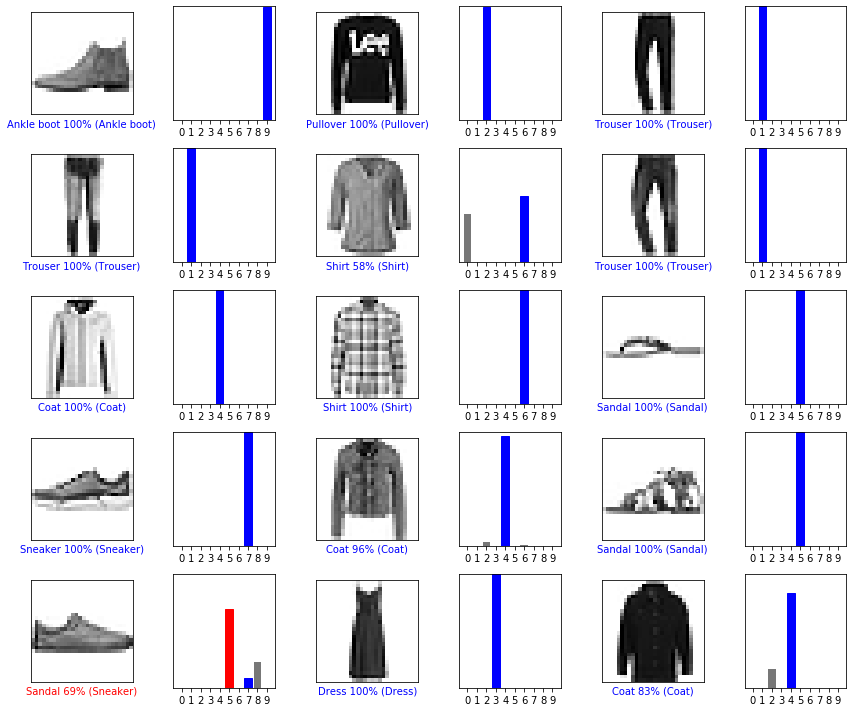

In [11]:
'''Create plot'''
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], labels_test, images_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], labels_test)
plt.tight_layout()
plt.show()